In [1]:
#from dataLoader import train_dataset,Counter,tqdm,plt,random
import matplotlib.pyplot as plt
import torch
import kagglehub
from torchvision import transforms
import matplotlib.pyplot as plt
import os
import config
from source.dataLoader import load_dataset 

In [2]:
config.DATASET_TO_USE = "btad" # or "mvtec"
config.VAL_SPLIT=None

In [3]:
if not os.path.exists(config.MVTEC_ROOT) and config.DATASET_TO_USE == 'mvtec':
    dataset_path = kagglehub.dataset_download(config.MVTEC_KAGGLE_DOWNLOAD_URL)
elif not os.path.exists(config.BTAD_ROOT) and config.DATASET_TO_USE == 'btad':
    dataset_path = kagglehub.dataset_download(config.BTAD_KAGGLE_DOWNLOAD_URL)
    dataset_path += "/BTech_Dataset_transformed"

print(f"Dataset loaded")

Dataset loaded


In [4]:
if config.DOWNLOAD_DATASET:
    DATASET = dataset_path
else:
    DATASET = config.MVTEC_ROOT if config.DATASET_TO_USE == 'mvtec' else config.BTAD_ROOT
    
train_dataset=None    
n_example_for_category=[]
categories = config.MVTEC_CATEGORIES if config.DATASET_TO_USE == 'mvtec' else config.BTAD_CATEGORIES

In [ ]:
train_dataset=None    
n_example_for_category=[]
categories = config.MVTEC_CATEGORIES if config.DATASET_TO_USE == 'mvtec' else config.BTAD_CATEGORIES
for category in categories:
    print(f"Processing category: {category}")

    # Load the dataset
    train_loader,_,_= load_dataset(
        main_path=DATASET,
        transform_train=None,
        transform_gt=None,
        transform_test=None,
        class_selected=category
    )
    
    n_example_for_category.append(len(train_loader.dataset))

# EDA of MVTEC-AD
---

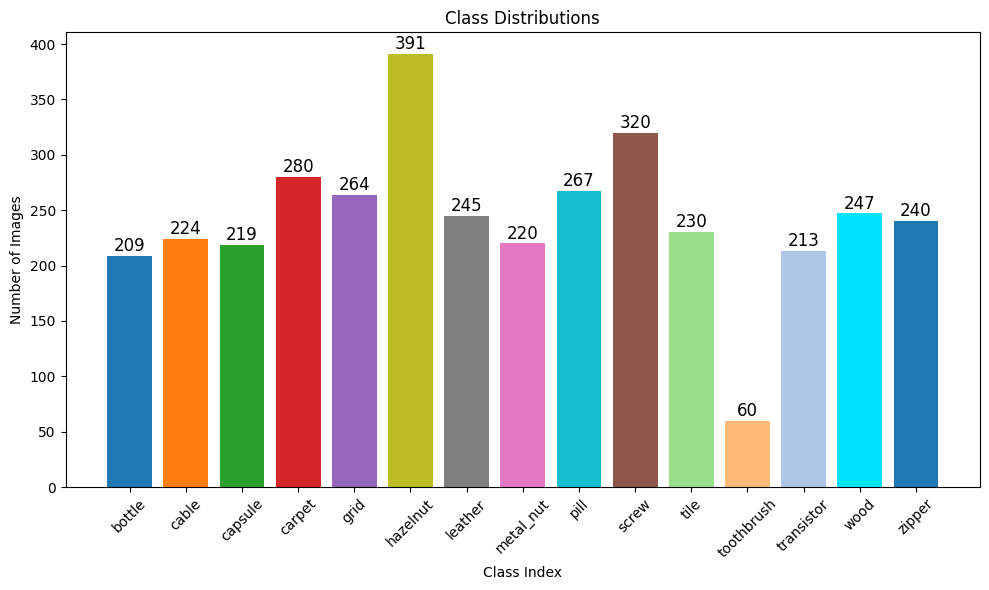

In [6]:
plt.figure(figsize=(10, 6))
palette = [
    "#1f77b4",  
    "#ff7f0e",  
    "#2ca02c", 
    "#d62728",  
    "#9467bd", 
    "#bcbd22",  
    "#7f7f7f",  
    "#e377c2", 
    "#17becf",  
    "#8c564b",  
    "#98df8a",  
    "#ffbb78", 
    "#aec7e8", 
    "#00e5ff"  
    
]

bars=plt.bar(categories ,n_example_for_category,color=palette)
for bar, count in zip(bars,n_example_for_category):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.8, str(count), ha='center', va='bottom', fontsize=12)
plt.xticks(categories,rotation=45)
plt.xlabel("Class Index")
plt.ylabel("Number of Images")
plt.title("Class Distributions")
plt.tight_layout()
plt.show()

# EDA of BTAD
---

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


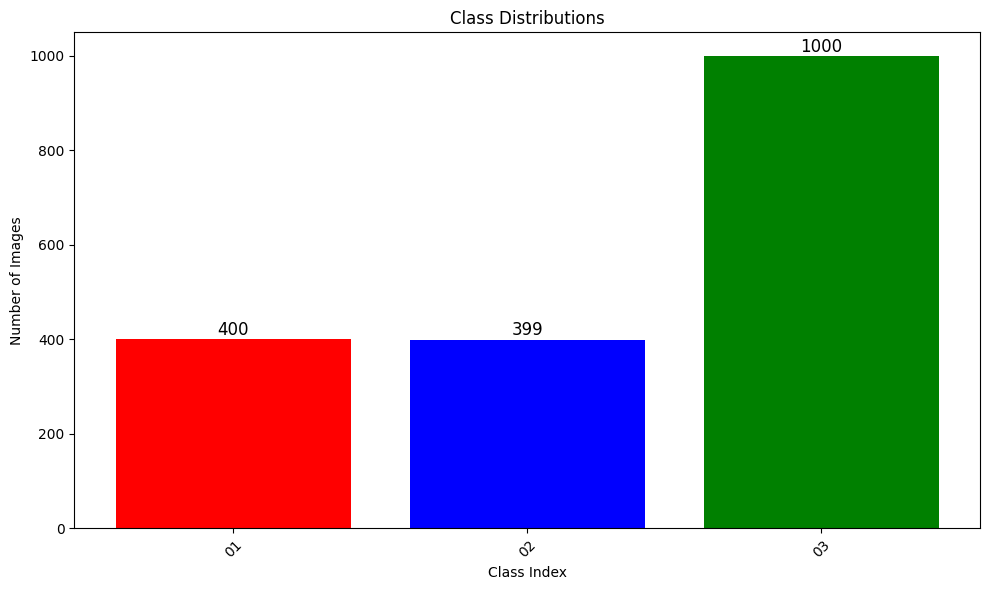

In [7]:
plt.figure(figsize=(10, 6))
palette=['red','blue','green']
bars=plt.bar(categories ,n_example_for_category,color=palette)
for bar, count in zip(bars,n_example_for_category):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.8, str(count), ha='center', va='bottom', fontsize=12)
plt.xticks(categories,rotation=45)
plt.xlabel("Class Index")
plt.ylabel("Number of Images")
plt.title("Class Distributions")
plt.tight_layout()
plt.show()

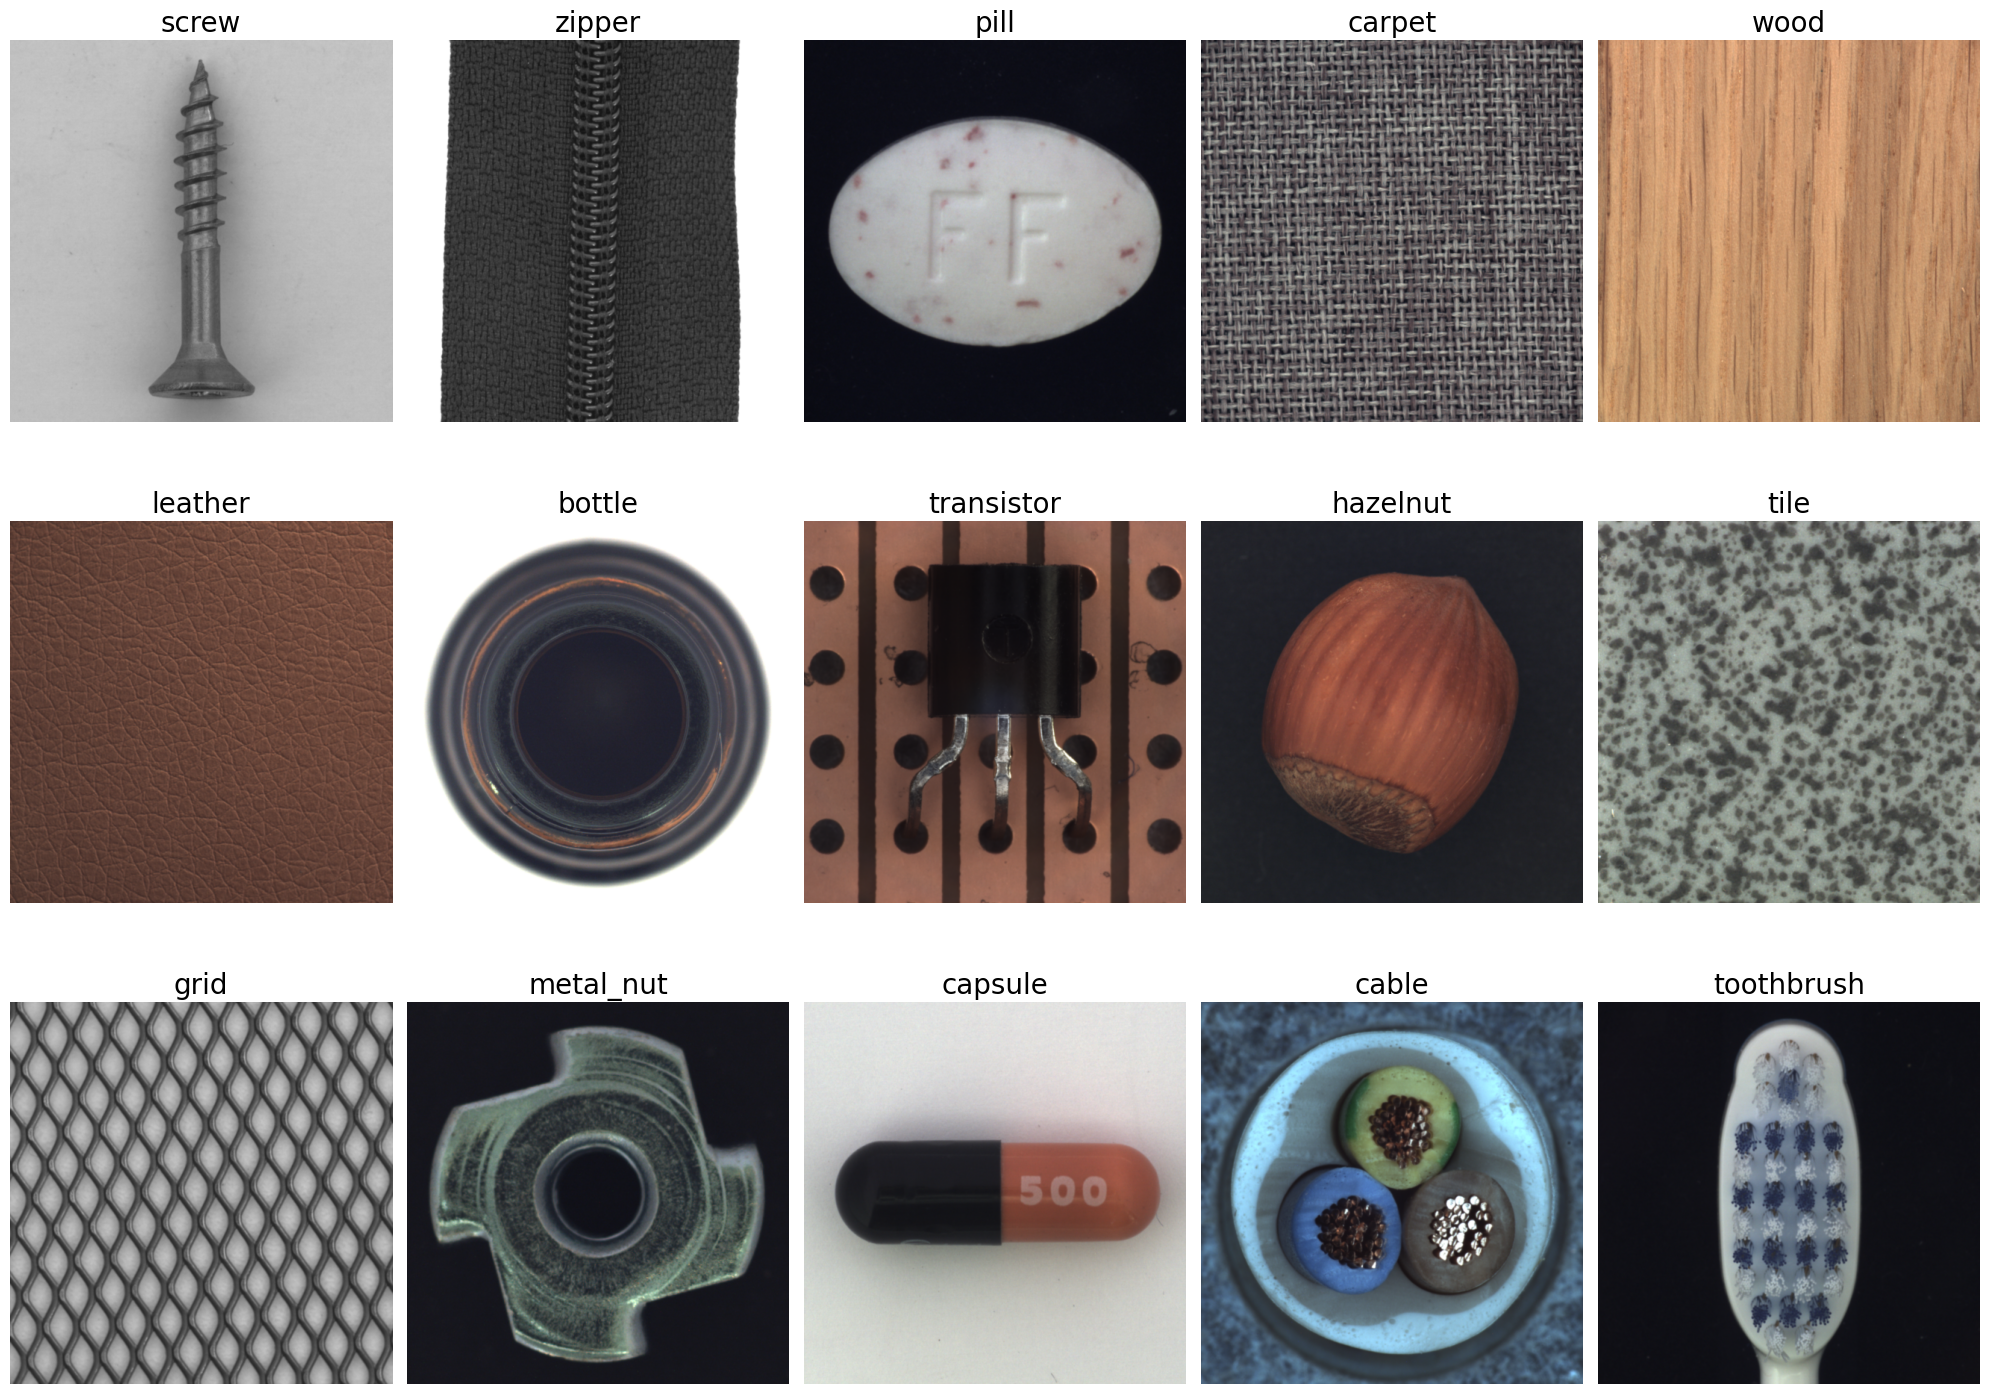

In [4]:
def convert_labels_to_words(logit,classes):
    return classes[logit]
def show_sample(dataset,title="Samples for each class"):
    d_img={}
    all_img=False
    random.seed(42)
    while not all_img:
        idx_r=random.randint(0,len(dataset)-1)
        img,label=dataset[idx_r]
        if label not in d_img:
            d_img[label]=img
        if len(list(d_img.keys()))==15:
            all_img=True   
    
    fig, axes = plt.subplots(3,5, figsize=(20,15))
    axes = axes.flatten() 
    i=0
    for label in d_img:
        img=d_img[label]
        img = img.permute(1, 2, 0).cpu().numpy()
        
        axes[i].imshow(img)
        axes[i].set_title(convert_labels_to_words(label,train_dataset.classes),fontdict={'fontsize': 20})
        axes[i].axis("off")
        i+=1
    #plt.suptitle("Images of all classes", weight="bold")
    plt.tight_layout()
    plt.show()
show_sample(train_dataset)       
    